# Gesture Recognition

Gesture recognition is a topic which aims to interpret the movements of an object by using sensors. The goal of this assignment is basically to provide efficient personalized gesture recognition on the dataset. Firstly, the time series of each class will be analyzed after some data manipulations. Then, two alternative time series representations will be proposed in order to summarize the data. 
 
There are 3 datasets which consist of the accelerations on the X, Y, and Z axis of 896 instances. While creating the dataset, a single three-axis accelerometer was used to collect data from eight users whose movements were seperated into 8 gesture patterns. Because the time series observations are given as acceleration values, they will be transformed into location informaion to analyze the patterns. 

# Required Packages & Data Preparation

In [1]:
library(data.table)
library(TSrepr)
library(ggplot2)
library("gg3D")

Warning message:
"package 'TSrepr' was built under R version 3.6.3"

In [2]:
#reading the datasets
x_train <- fread("uWaveGestureLibrary_X_TRAIN")
y_train <- fread("uWaveGestureLibrary_Y_TRAIN")
z_train <- fread("uWaveGestureLibrary_Z_TRAIN")

head(x_train)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316
6,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,...,-0.7964140,-0.7417282,-0.6946985,-0.6476688,-0.6476688,-0.64766875,-0.64766875,-0.64766875,-0.64766875,-0.64766875
5,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,...,-0.2376337,-0.2376337,-0.2376337,-0.2376337,-0.2376337,-0.23763371,-0.23763371,-0.23763371,-0.23763371,-0.23763371
5,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,...,-0.2820107,-0.2369291,-0.1918477,-0.1467662,-0.1016848,-0.06120346,-0.05663826,-0.05546207,-0.05546207,-0.05546207
3,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,...,1.2072899,1.1478218,1.0943436,1.0603618,1.0531583,1.04446710,1.01898080,0.90994938,0.79101316,0.67207694
4,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,...,-1.4369826,-1.4369826,-1.4369826,-1.4369826,-1.4369826,-1.44034250,-1.45251250,-1.46844580,-1.48437920,-1.50031250
8,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,...,0.5784697,0.5877041,0.5969386,0.6061730,0.6207059,0.63523879,0.65370767,0.67217655,0.69064543,0.70911432


### Manipulations on the X Axis

In [3]:
setnames(x_train, "V1", "class")
x_train <- x_train[order(class)]
x_train[, class:=as.character(class)]
x_train[, id:=as.character(1:.N)]

#melting operations
x_train_long <- melt(x_train, id.vars=c("id", "class"))
x_train_long[, time:=as.numeric(gsub("\\D", "", variable))-1]
x_train_long <- x_train_long[, list(id,class,time,value)]
x_train_long <- x_train_long[order(id,time)]
x_train_long[, velocity:=cumsum(value), by=id]
x_train_long[, cumSum:=cumsum(velocity), by=id]
head(x_train_long)

id,class,time,value,velocity,cumSum
1,1,1,-0.7914472,-0.7914472,-0.7914472
1,1,2,-0.7914472,-1.5828944,-2.3743415
1,1,3,-0.7958727,-2.3787671,-4.7531086
1,1,4,-0.8100650,-3.1888321,-7.9419407
1,1,5,-0.8492300,-4.0380621,-11.9800028
1,1,6,-0.9034648,-4.9415269,-16.9215298


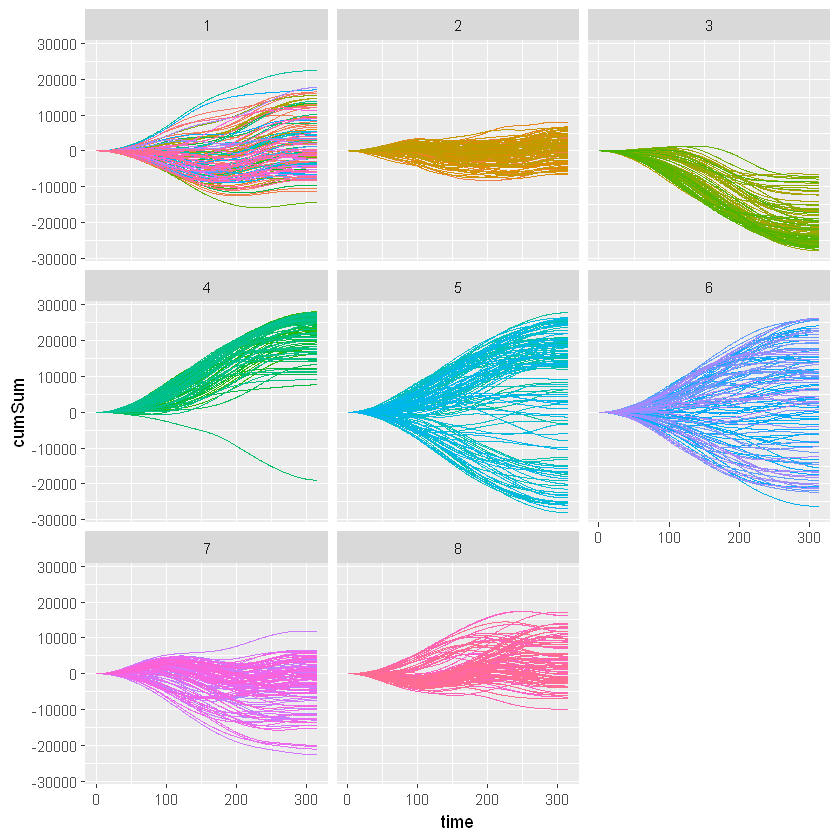

In [4]:
#visualizing time series based on class
ggplot(x_train_long, aes(time, cumSum)) + geom_line(aes(color=id)) + facet_wrap(~class) + theme(legend.position = "none")

Above, the x axis locations of the instances belonging to the same class over time are displayed. Almost every class has its own pattern. 

### Manipulations on the Y Axis

In [5]:
setnames(y_train, "V1", "class")
y_train <- y_train[order(class)]
y_train[, class:=as.character(class)]
y_train[, id:=as.character(1:.N)]

#melting operations
y_train_long <- melt(y_train, id.vars=c("id", "class"))
y_train_long[, time:=as.numeric(gsub("\\D", "", variable))-1]
y_train_long <- y_train_long[, list(id,class,time,value)]
y_train_long <- y_train_long[order(id,time)]
y_train_long[, velocity:=cumsum(value), by=id]
y_train_long[, cumSum:=cumsum(velocity), by=id]
head(y_train_long)

id,class,time,value,velocity,cumSum
1,1,1,-1.959984,-1.959984,-1.959984
1,1,2,-1.959984,-3.919968,-5.879951
1,1,3,-1.956600,-5.876568,-11.756519
1,1,4,-1.945750,-7.822319,-19.578838
1,1,5,-1.915809,-9.738128,-29.316966
1,1,6,-1.874347,-11.612474,-40.929440


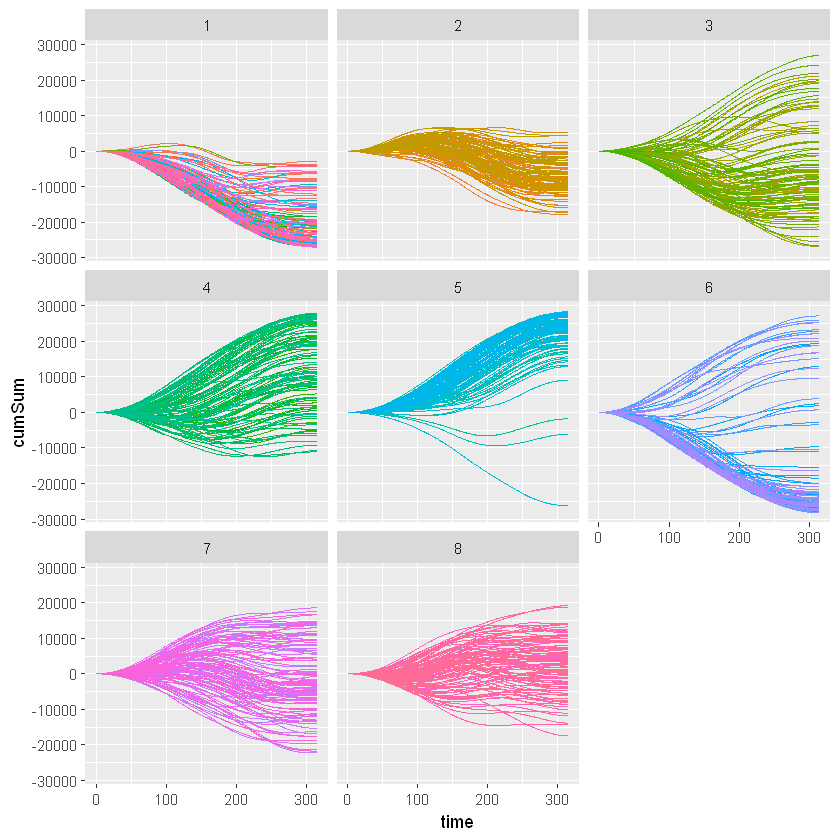

In [6]:
#visualizing time series based on class
ggplot(y_train_long, aes(time, cumSum)) + geom_line(aes(color=id)) + facet_wrap(~class) + theme(legend.position = "none")

Above, the y axis locations of the instances belonging to the same class over time are displayed. Almost every class has its own pattern. 

### Manipulations on the Z Axis

In [7]:
setnames(z_train, "V1", "class")
z_train <- z_train[order(class)]
z_train[, class:=as.character(class)]
z_train[, id:=as.character(1:.N)]

#melting operations
z_train_long <- melt(z_train, id.vars=c("id", "class"))
z_train_long[, time:=as.numeric(gsub("\\D", "", variable))-1]
z_train_long <- z_train_long[, list(id,class,time,value)]
z_train_long <- z_train_long[order(id,time)]
z_train_long[, velocity:=cumsum(value), by=id]
z_train_long[, cumSum:=cumsum(velocity), by=id]
head(z_train_long)

id,class,time,value,velocity,cumSum
1,1,1,-0.2490781,-0.2490781,-0.2490781
1,1,2,-0.2490781,-0.4981562,-0.7472342
1,1,3,-0.2514390,-0.7495951,-1.4968294
1,1,4,-0.2590101,-1.0086052,-2.5054346
1,1,5,-0.2799033,-1.2885085,-3.7939431
1,1,6,-0.3088358,-1.5973444,-5.3912875


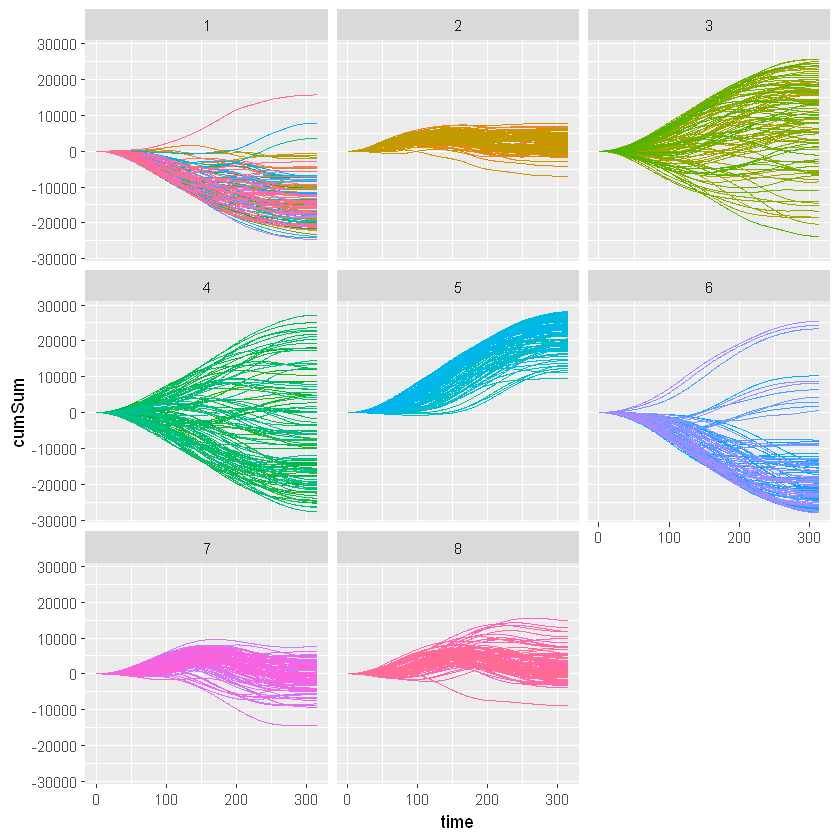

In [8]:
#visualizing time series based on class
ggplot(z_train_long, aes(time, cumSum)) + geom_line(aes(color=id)) + facet_wrap(~class) + theme(legend.position = "none")

Above, the z axis observations of the instances belonging to the same class over time are displayed. Almost every class has its own pattern. 

### Merging the Data

In [9]:
dt <- cbind(x_train_long, y_train_long$cumSum, z_train_long$cumSum)
dt[, `:=`(value=NULL, velocity=NULL)]
colnames(dt) <- c("id", "class", "time", "X", "Y", "Z")
head(dt)
str(dt)

id,class,time,X,Y,Z
1,1,1,-0.7914472,-1.959984,-0.2490781
1,1,2,-2.3743415,-5.879951,-0.7472342
1,1,3,-4.7531086,-11.756519,-1.4968294
1,1,4,-7.9419407,-19.578838,-2.5054346
1,1,5,-11.9800028,-29.316966,-3.7939431
1,1,6,-16.9215298,-40.929440,-5.3912875


Classes 'data.table' and 'data.frame':	282240 obs. of  6 variables:
 $ id   : chr  "1" "1" "1" "1" ...
 $ class: chr  "1" "1" "1" "1" ...
 $ time : num  1 2 3 4 5 6 7 8 9 10 ...
 $ X    : num  -0.791 -2.374 -4.753 -7.942 -11.98 ...
 $ Y    : num  -1.96 -5.88 -11.76 -19.58 -29.32 ...
 $ Z    : num  -0.249 -0.747 -1.497 -2.505 -3.794 ...
 - attr(*, ".internal.selfref")=<externalptr> 


# 3D Visualization

Below, random instances of each class will be selected and 3D visualized.  

### Class 1 | ID 30

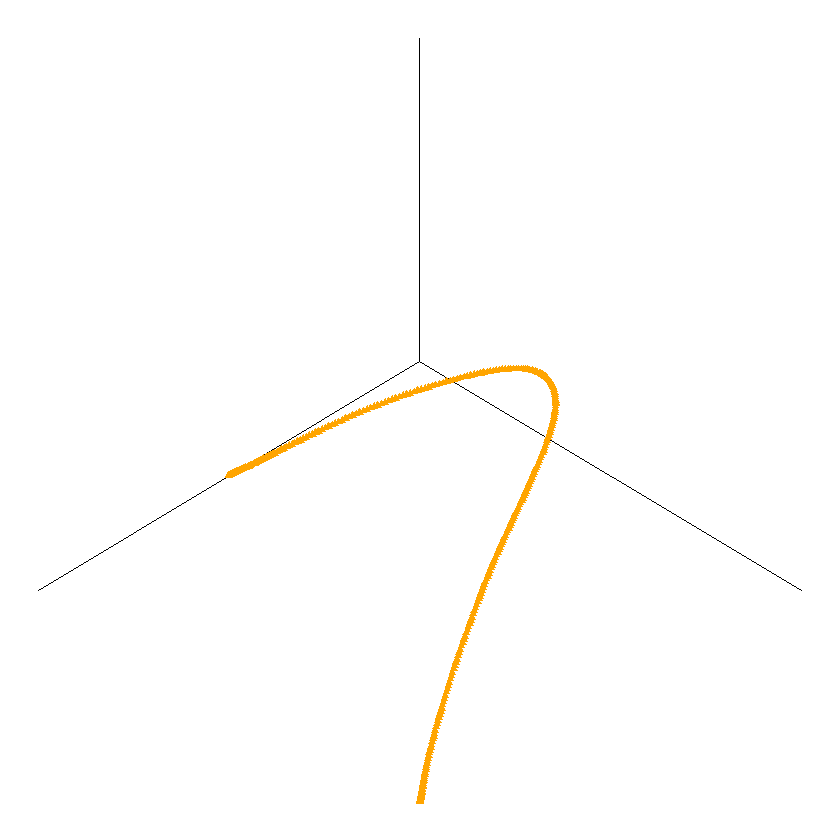

In [10]:
ggplot(dt[dt[, id==30]], aes(x=X, y=Y, z=Z)) + 
    theme_void() +
    axes_3D() +
    stat_3D(color="orange", shape=17) +
    theme(legend.position = "none")

The 3D representation is like a half circle. Shape #7 or #8 may fit.  

### Class 2 | ID 130

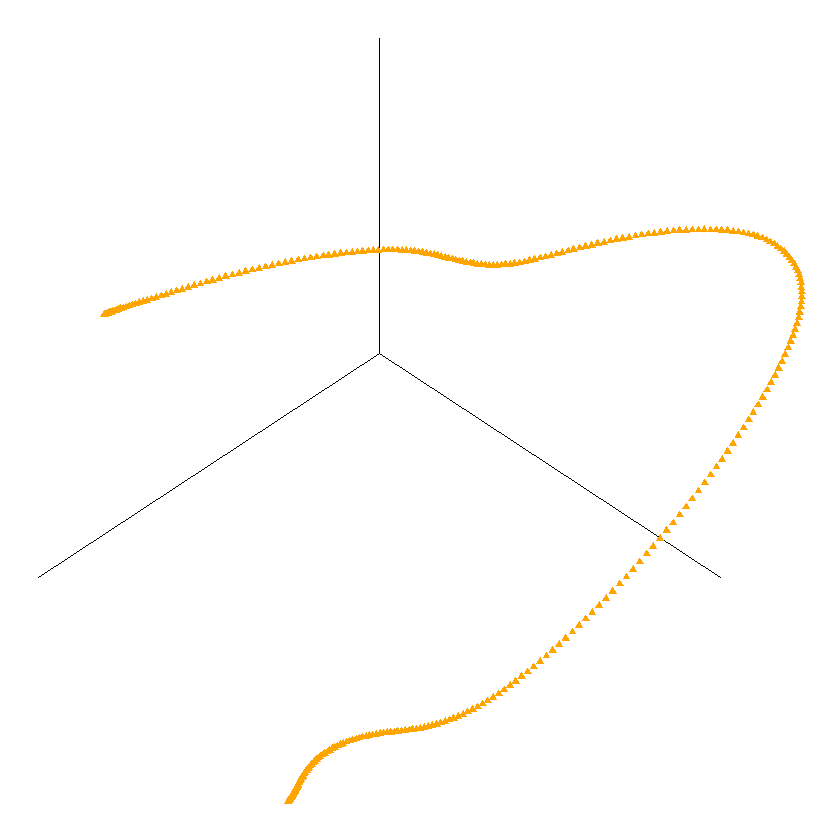

In [11]:
ggplot(dt[dt[, id==130]], aes(x=X, y=Y, z=Z)) + 
    theme_void() +
    axes_3D() +
    stat_3D(color="orange", shape=17) +
    theme(legend.position = "none")

The shape is like a half-square. Shape #2 may fit.  

### Class 3 | ID 241

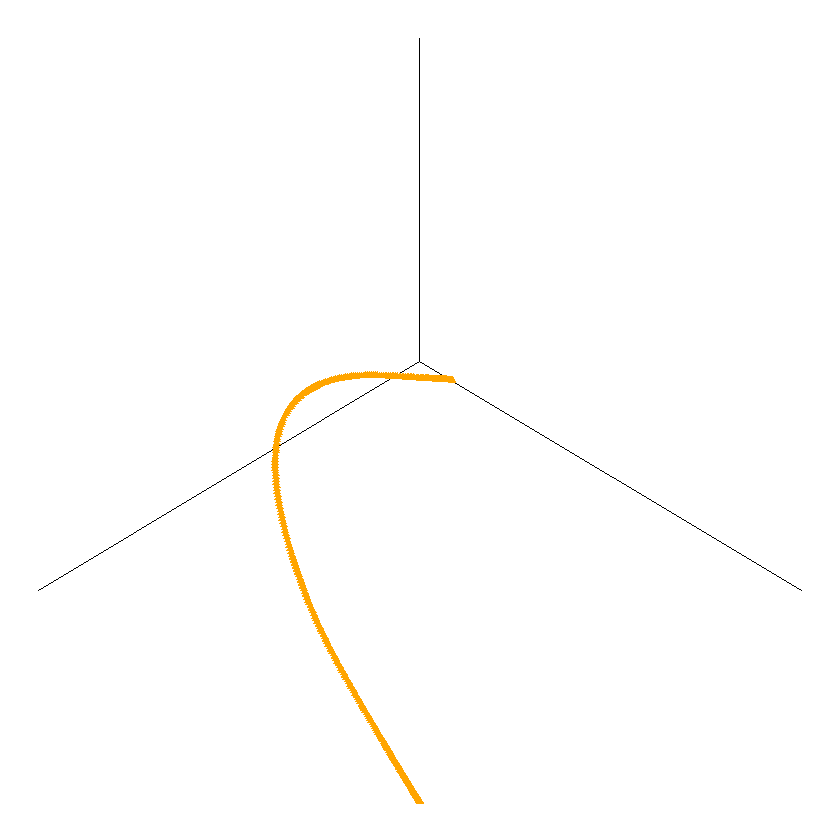

In [12]:
ggplot(dt[dt[, id==241]], aes(x=X, y=Y, z=Z)) + 
    theme_void() +
    axes_3D() +
    stat_3D(color="orange", shape=17) +
    theme(legend.position = "none")

Again, the 3D representation is like a half circle. Shape #7 or #8 may fit.  

### Class 4 | ID 347

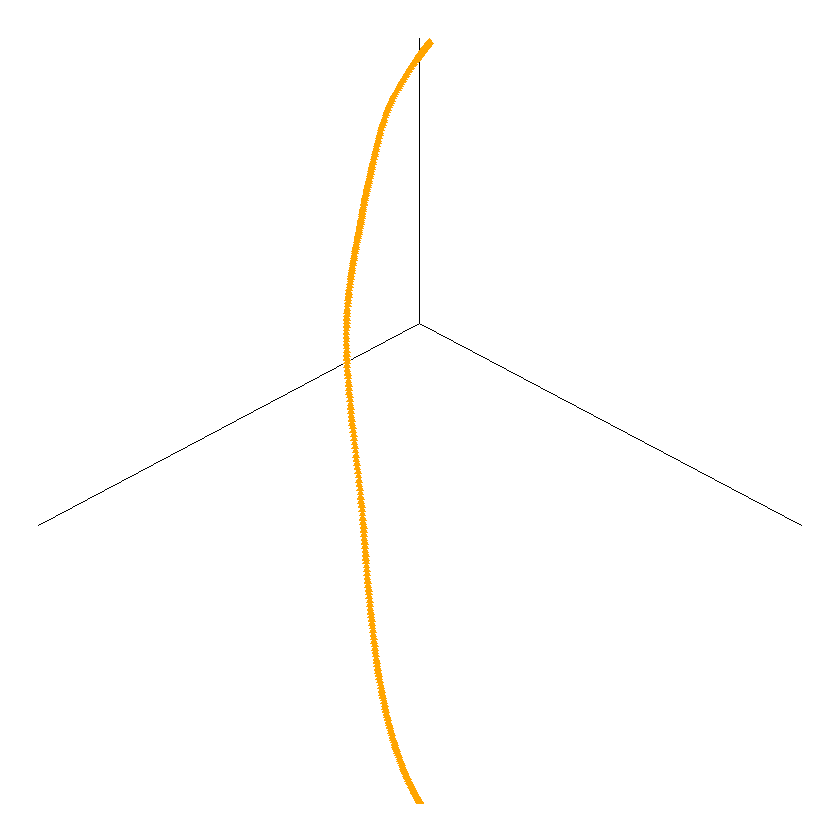

In [13]:
ggplot(dt[dt[, id==347]], aes(x=X, y=Y, z=Z)) + 
    theme_void() +
    axes_3D() +
    stat_3D(color="orange", shape=17) +
    theme(legend.position = "none")

There may be a pattern from top to bottom or vice versa. Shape #5 or #6 may fit.  

### Class 5 | ID 455

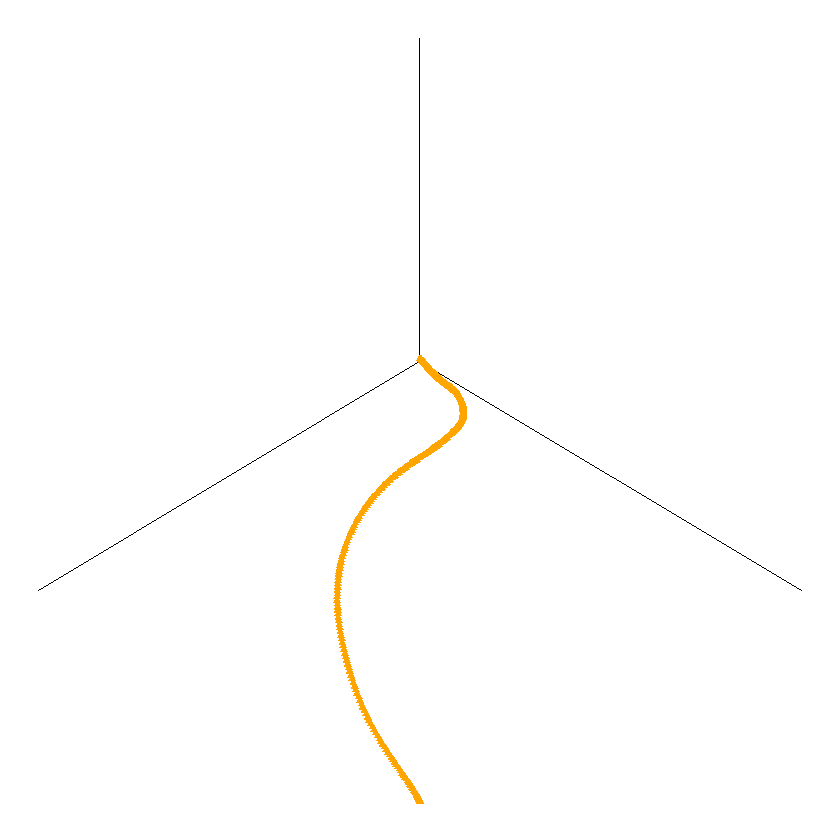

In [14]:
ggplot(dt[dt[, id==455]], aes(x=X, y=Y, z=Z)) + 
    theme_void() +
    axes_3D() +
    stat_3D(color="orange", shape=17) +
    theme(legend.position = "none")

It seems that there is a pattern from right to left or from left to right. Shape #3 or #4 may fit.  

### Class 6 | ID 574

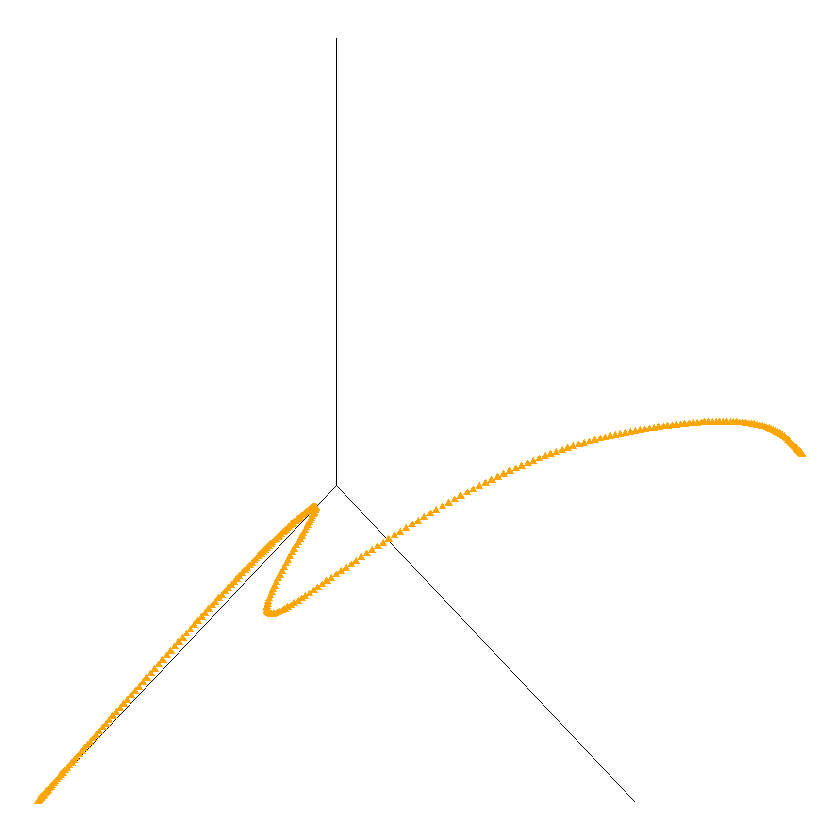

In [15]:
ggplot(dt[dt[, id==574]], aes(x=X, y=Y, z=Z)) + 
    theme_void() +
    axes_3D() +
    stat_3D(color="orange", shape=17) +
    theme(legend.position = "none")

The shape has sharp turning point. Shape #1 may fit.  

### Class 7 | ID 685

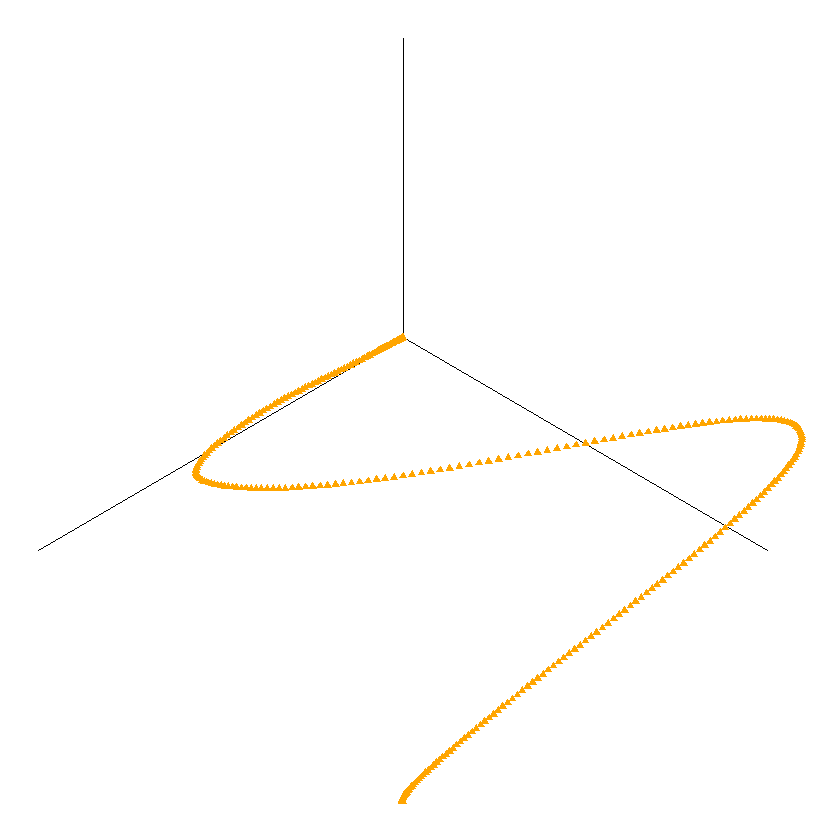

In [16]:
ggplot(dt[dt[, id==685]], aes(x=X, y=Y, z=Z)) + 
    theme_void() +
    axes_3D() +
    stat_3D(color="orange", shape=17) +
    theme(legend.position = "none")

It seems that there is a pattern from right to left or from left to right. Shape #3 or #4 may fit.  

### Class 8 | ID 802

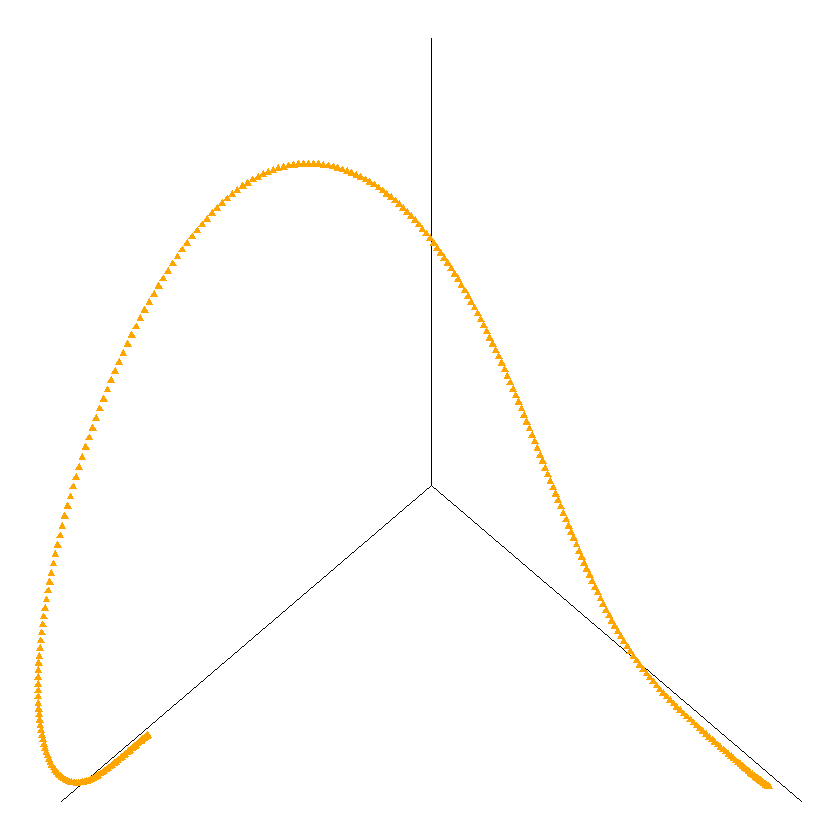

In [17]:
ggplot(dt[dt[, id==802]], aes(x=X, y=Y, z=Z)) + 
    theme_void() +
    axes_3D() +
    stat_3D(color="orange", shape=17) +
    theme(legend.position = "none")

There may be a pattern from top to bottom or vice versa. Shape #5 or #6 may fit.  

# Alternative Time Series Representations 

### Representing with the Distance from (0,0)

The observations of each instance will be divided into 10 intervals and then the statics will be calculated for each interval. Distance from (0,0) will be calculated by euclidean distance. 

In [18]:
stats <- dt
stats[, interval_id:=cut(time, 10, ordered_result=T), by=list(id)]
stats[, interval_id:=as.numeric(interval_id)]
stats <- stats[, list(meanX=mean(X), meanY=mean(Y), meanZ=mean(Z), distFromBase=sqrt(mean(X)^2+mean(Y)^2+mean(Z)^2)), 
               by=list(class,id,interval_id)]
head(stats, 12)

class,id,interval_id,meanX,meanY,meanZ,distFromBase
1,1,1,-166.458930,-352.3956,-56.42684,393.7959
1,1,2,-1115.478605,-2179.5685,-426.57489,2485.3123
1,1,3,-2941.253693,-5284.4560,-1500.07307,6231.1049
1,1,4,-5029.037918,-9108.9150,-2981.96583,10823.8475
1,1,5,-5525.275748,-12547.4334,-3347.47146,14112.8425
1,1,6,-4709.106551,-15960.5213,-3331.80524,16971.0003
1,1,7,-3359.310168,-18788.5605,-4471.71991,19603.3479
1,1,8,-2205.812841,-20607.6598,-6121.24896,21610.4359
1,1,9,-1840.576097,-21673.1182,-6727.40987,22767.7363
1,1,10,-1864.861265,-22240.6036,-6742.50187,23314.8770


In order to see the pattern for each class, the mean distance of all instances will be calculated for the same intervals. 

In [19]:
stats2 <- stats
stats2 <- stats2[, list(meanClassDistFromBase=mean(distFromBase)), by=list(class,interval_id)]
head(stats2, 12)

class,interval_id,meanClassDistFromBase
1,1,346.3628
1,2,2228.8208
1,3,5705.1626
1,4,10021.6496
1,5,14227.1826
1,6,17950.4034
1,7,21165.3408
1,8,23716.4073
1,9,25408.9917
1,10,26255.1453


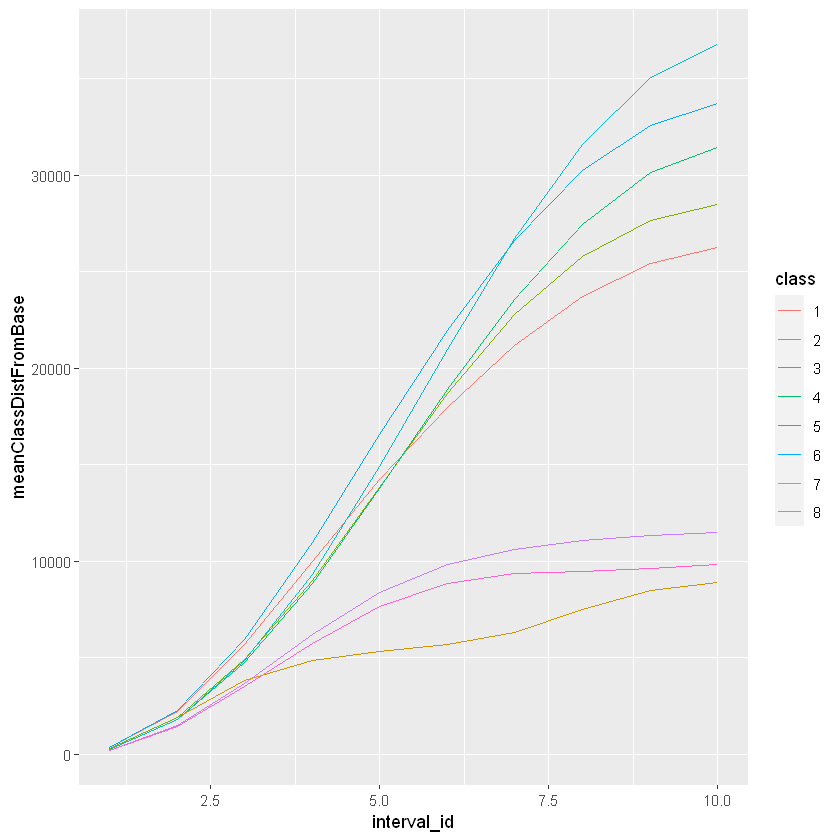

In [20]:
ggplot(stats2, aes(x=interval_id, y=meanClassDistFromBase)) + geom_line(aes(color=class)) 

Although it is hard to see the exact patterns that is distinguishing for each class, the pattern we obtain can be used to distinguish some class pairs from each other like class 5 and class 2. Class 5 has relatively high points and high slope. Class 2 has lower observation points and lower slope.  

### Representing with Symbolic Aggregate Approximation

Two different approach will be used. Firstly, each instance will be splited into 10 groups and the SAX representations of each instance will be shown. The most frequent representation of each class will be selected to represent the class.  
 
Secondly, the mean coordinates for each class will be calculated. Then, they will be seperated to 10 groups and the SAX representations of each class will be shown. rper_sax func from TSrepr library will be used to get the letter representations. The q values of repr_sax is chosen as 33 in order to get 10 letter representations.  

In [21]:
SAX_repr <- dt[, id:=as.numeric(id)]
SAX_repr <- SAX_repr[, list(Xrepr=repr_sax(X, q=33, a=5), Yrepr=repr_sax(Y, q=33, a=5), 
                            Zrepr=repr_sax(Z, q=33, a=5)), by=list(id)]
head(SAX_repr, 12)

id,Xrepr,Yrepr,Zrepr
1,a,a,a
1,a,a,a
1,a,a,a
1,a,a,a
1,a,a,a
1,a,a,a
1,a,a,a
1,a,a,a
1,a,a,a
1,a,a,a


In [22]:
dtable1 <- data.table(id=0, Xrepr="NA", Yrepr="NA", Zrepr="NA")

for (i in (1:896)) {
    temp <- data.table(id=i, 
                       Xrepr=paste(SAX_repr[SAX_repr[, id==i]]$Xrepr, collapse = ''), 
                       Yrepr=paste(SAX_repr[SAX_repr[, id==i]]$Yrepr, collapse = ''), 
                       Zrepr=paste(SAX_repr[SAX_repr[, id==i]]$Zrepr, collapse = ''))
    dtable1 <- rbind(dtable1, temp)
}

dtable1 <- dtable1[-1]
head(dtable1)

id,Xrepr,Yrepr,Zrepr
1,aaaaaaaaaa,aaaaaaaaaa,aaaaaaaaaa
2,aaaaaeeeee,aaaaaaaaaa,aaaaaaaaaa
3,aaaaaeeeee,aaaaaaaaaa,aaaaaaaaaa
4,eeeeeeeeee,aaaaaaaaaa,aaaaaaaaaa
5,eeeaaaaeee,aaaaaaaaaa,aaaaaaaaaa
6,aaaaaaaaaa,aaaaaaaaaa,aaaaaaaaaa


Now, the most frequent representations and their frequency will be calculated. 

In [23]:
#FOR X AXIS
#for class 1
sort(table(dtable1[1:122,]$Xrepr), decreasing=T)[1]
#for class 2
sort(table(dtable1[123:230,]$Xrepr), decreasing=T)[1]
#for class 3
sort(table(dtable1[231:336,]$Xrepr), decreasing=T)[1]
#for class 4
sort(table(dtable1[337:446,]$Xrepr), decreasing=T)[1]
#for class 5
sort(table(dtable1[447:573,]$Xrepr), decreasing=T)[1]
#for class 6
sort(table(dtable1[574:684,]$Xrepr), decreasing=T)[1]
#for class 7
sort(table(dtable1[685:796,]$Xrepr), decreasing=T)[1]
#for class 8
sort(table(dtable1[797:896,]$Xrepr), decreasing=T)[1]

aaaaaaaaaa 
        57

eeeeeeeeee 
        38

aaaaaaaaaa 
        92

eeeeeeeeee 
       106

eeeeeeeeee 
        70

eeeeeeeeee 
        63

eeeeeeeeee 
        27

aaaaaaaaaa 
        21

In [24]:
#FOR Y AXIS
#for class 1
sort(table(dtable1[1:122,]$Yrepr), decreasing=T)[1]
#for class 2
sort(table(dtable1[123:230,]$Yrepr), decreasing=T)[1]
#for class 3
sort(table(dtable1[231:336,]$Yrepr), decreasing=T)[1]
#for class 4
sort(table(dtable1[337:446,]$Yrepr), decreasing=T)[1]
#for class 5
sort(table(dtable1[447:573,]$Yrepr), decreasing=T)[1]
#for class 6
sort(table(dtable1[574:684,]$Yrepr), decreasing=T)[1]
#for class 7
sort(table(dtable1[685:796,]$Yrepr), decreasing=T)[1]
#for class 8
sort(table(dtable1[797:896,]$Yrepr), decreasing=T)[1]

aaaaaaaaaa 
       118

eeeeeaaaaa 
        25

aaaaaaaaaa 
        69

eeeeeeeeee 
        51

eeeeeeeeee 
       122

aaaaaaaaaa 
        88

eeeeeeeeee 
        33

aaaaaaaaaa 
        24

In [25]:
#FOR Z AXIS
#for class 1
sort(table(dtable1[1:122,]$Zrepr), decreasing=T)[1]
#for class 2
sort(table(dtable1[123:230,]$Zrepr), decreasing=T)[1]
#for class 3
sort(table(dtable1[231:336,]$Zrepr), decreasing=T)[1]
#for class 4
sort(table(dtable1[337:446,]$Zrepr), decreasing=T)[1]
#for class 5
sort(table(dtable1[447:573,]$Zrepr), decreasing=T)[1]
#for class 6
sort(table(dtable1[574:684,]$Zrepr), decreasing=T)[1]
#for class 7
sort(table(dtable1[685:796,]$Zrepr), decreasing=T)[1]
#for class 8
sort(table(dtable1[797:896,]$Zrepr), decreasing=T)[1]

aaaaaaaaaa 
       115

eeeeeeeeee 
        80

eeeeeeeeee 
        60

aaaaaaaaaa 
        54

eeeeeeeeee 
       116

aaaaaaaaaa 
        99

eeeeeeeeee 
        45

eeeeeeeeee 
        57

In [26]:
#they will be used in conclusion part
Xrepr_1 <- c("aaaaaaaaaa", "eeeeeeeeee", "aaaaaaaaaa", "eeeeeeeeee", "eeeeeeeeee", "eeeeeeeeee", "eeeeeeeeee", "aaaaaaaaaa")
Yrepr_1 <- c("aaaaaaaaaa", "eeeeeaaaaa", "aaaaaaaaaa", "eeeeeeeeee", "eeeeeeeeee", "aaaaaaaaaa", "eeeeeeeeee", "aaaaaaaaaa")
Zrepr_1 <- c("aaaaaaaaaa", "eeeeeeeeee", "eeeeeeeeee", "aaaaaaaaaa", "eeeeeeeeee", "aaaaaaaaaa", "eeeeeeeeee", "eeeeeeeeee")

Secondly, the representains will be shown by the mean coordinates of each classes. 

In [27]:
SAX_repr2 <- dt[, list(meanX=mean(X),meanY=mean(Y), meanZ=mean(Z)), by=list(class, time)]
SAX_repr2 <- SAX_repr2[, list(Xrepr=repr_sax(meanX, q=33, a=5), 
                              Yrepr=repr_sax(meanY, q=33, a=5), 
                              Zrepr=repr_sax(meanZ, q=33, a=5)), by=list(class)]

head(SAX_repr2, 12)

class,Xrepr,Yrepr,Zrepr
1,a,a,a
1,a,a,a
1,a,a,a
1,a,a,a
1,a,a,a
1,a,a,a
1,a,a,a
1,e,a,a
1,e,a,a
1,e,a,a


In [28]:
dtable2 <- data.table(class=0, Xrepr="NA", Yrepr="NA", Zrepr="NA")

for (i in (1:8)) {
    temp <- data.table(class=i, 
                       Xrepr=paste(SAX_repr2[SAX_repr2[, class==i]]$Xrepr, collapse = ''), 
                       Yrepr=paste(SAX_repr2[SAX_repr2[, class==i]]$Yrepr, collapse = ''),
                       Zrepr=paste(SAX_repr2[SAX_repr2[, class==i]]$Zrepr, collapse = ''))
     
    dtable2 <- rbind(dtable2, temp)
}

dtable2 <- dtable2[-1]
dtable2

class,Xrepr,Yrepr,Zrepr
1,aaaaaaaeee,aaaaaaaaaa,aaaaaaaaaa
2,eeeaaaaaee,eeeeeaaaaa,eeeeeeeeee
3,aaaaaaaaaa,aaaaaaaaaa,eeeeeeeeee
4,eeeeeeeeee,eeeeeeeeee,aaaaaaaaaa
5,eeeeeeeeee,eeeeeeeeee,eeeeeeeeee
6,eeeeeeeeee,aaaaaaaaaa,aaaaaaaaaa
7,eeeeaaaaaa,eeeeeeeaaa,eeeeeeeeaa
8,aaaaeeeeee,aaaeeeeeee,eeeeeeeeee


# Conclusion

In [29]:
lastTable <- dtable2
colnames(lastTable) <- c("class", "Xrepr_2", "Yrepr_2", "Zrepr_2")
lastTable <- cbind(lastTable, Xrepr_1, Yrepr_1, Zrepr_1)
lastTable

class,Xrepr_2,Yrepr_2,Zrepr_2,Xrepr_1,Yrepr_1,Zrepr_1
1,aaaaaaaeee,aaaaaaaaaa,aaaaaaaaaa,aaaaaaaaaa,aaaaaaaaaa,aaaaaaaaaa
2,eeeaaaaaee,eeeeeaaaaa,eeeeeeeeee,eeeeeeeeee,eeeeeaaaaa,eeeeeeeeee
3,aaaaaaaaaa,aaaaaaaaaa,eeeeeeeeee,aaaaaaaaaa,aaaaaaaaaa,eeeeeeeeee
4,eeeeeeeeee,eeeeeeeeee,aaaaaaaaaa,eeeeeeeeee,eeeeeeeeee,aaaaaaaaaa
5,eeeeeeeeee,eeeeeeeeee,eeeeeeeeee,eeeeeeeeee,eeeeeeeeee,eeeeeeeeee
6,eeeeeeeeee,aaaaaaaaaa,aaaaaaaaaa,eeeeeeeeee,aaaaaaaaaa,aaaaaaaaaa
7,eeeeaaaaaa,eeeeeeeaaa,eeeeeeeeaa,eeeeeeeeee,eeeeeeeeee,eeeeeeeeee
8,aaaaeeeeee,aaaeeeeeee,eeeeeeeeee,aaaaaaaaaa,aaaaaaaaaa,eeeeeeeeee


In this assignment, 896 observations of the gesture data was given as splitted into 8 classes. The aim was visualizing them and finding two different representation alternatives to classify the movements. After the visualization part, the data was splited into 10 time intervals. For each time interval, the distances from the (0,0) point were calculated to represent the series. Secondly, the SAX representations were made by two different approach. Again, the time attribute was splited into 10 intervals. As the first approach, the SAX representations were shown for each instances and their mean was taken as the representation. As the second approach, the mean of the coordinates were taken and then the SAX representations were shown for each classes.  
 
Above, the representations of two approach can be seen. At a first glance, the second approach seems to be better to classify the classes. Therefore, the second approach is chosen for the second alternative representation.  
 
In the first representation, distance from the base point, it is hard to distinguish some of the classes from each other. For example, classes of 4, 5, and 6 cannot be seperated from each other by using the first representation. However, we can classify them by using SAX representations. Therefore, it may be better to use the second representation with second approach.  